**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt export persistence](#toc3_1_)    
    - 3.1.1. [Effect on Foreign Economy and Prices](#toc3_1_1_)    
  - 3.2. [National accouting - quantities](#toc3_2_)    
  - 3.3. [National accouting - prices](#toc3_3_)    
  - 3.4. [Labor market](#toc3_4_)    
  - 3.5. [Capital accumulation](#toc3_5_)    
  - 3.6. [Production firms](#toc3_6_)    
  - 3.7. [Phillips curve](#toc3_7_)    
  - 3.8. [Government](#toc3_8_)    
  - 3.9. [Households - aggregate](#toc3_9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Export shock - further comments

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

In [3]:
par = model.par                 # set model parameters
ss = model.ss                   # create namespace for steady state
sol = model.sol                 # create namespace for solution

In [5]:
parameter = 'gamma_X'                                   # set parameter 
parvalues = [0.0,0.5,0.75]                              # set parameter values
par.t_b = 0                                             # flexible tax rate
par.delta_B = 0                                         # flexible tax rate
models = model.multi_model(parameter,parvalues)      # create a list of model. One for each value.

Jacobian calculated in 1.0 mins 20 secs
Jacobian calculated in 35.4 secs
Jacobian calculated in 35.8 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

In [6]:
Tshock = 50                                                 # length of shock
persistence = 0.80**np.arange(Tshock)                       # persistence of shock
price_shock = 0.005                                         # size of shock

In [7]:
for i in range(len(models)):

    models[i].set_exo_ss()                                                                              # set steady state exogenous variables
    models[i].set_unknowns_ss()                                                                         # set steady state unknown variables

    models[i].sol.chi[:Tshock] = models[i].ss.chi + 2*price_shock*models[i].ss.chi*persistence          # shock to foreign demand shifter
    models[i].sol.P_F[:Tshock] = models[i].ss.P_F + price_shock*models[i].ss.P_F*persistence            # shock to foreign prices
    models[i].sol.P_M_C[:Tshock] = models[i].ss.P_M_C + price_shock*models[i].ss.P_M_C*persistence      # shock to consumption import prices
    models[i].sol.P_M_G[:Tshock] = models[i].ss.P_M_G + price_shock*models[i].ss.P_M_G*persistence      # shock to government consumption import prices
    models[i].sol.P_M_I[:Tshock] = models[i].ss.P_M_I + price_shock*models[i].ss.P_M_I*persistence      # shock to investment import prices
    models[i].sol.P_M_X[:Tshock] = models[i].ss.P_M_X + price_shock*models[i].ss.P_M_X*persistence      # shock to export import prices

    models[i].find_IRF()                                                                                # find impulse response functions


initial:
t1-t0 = 0.02499 secs
it = 4
    max. abs. error = 1.81e-11
    2.05e-12 in A_R_ini_error
    1.04e-13 in Aq_diff
    3.94e-13 in FOC_capital_agency
    2.83e-12 in FOC_K_ell
    1.81e-11 in mkt_clearing
    1.32e-12 in PC

solve: t1-t0 = 0.17591 secs
evaluate + update: t3-t2 = 0.08995 secs
initial:
t1-t0 = 0.01899 secs
it = 4
    max. abs. error = 2.83e-12
    6.84e-14 in A_R_ini_error
    2.22e-15 in Aq_diff
    1.27e-14 in FOC_capital_agency
    3.73e-14 in FOC_K_ell
    2.83e-12 in mkt_clearing
    5.07e-14 in PC

solve: t1-t0 = 0.19589 secs
evaluate + update: t3-t2 = 0.08795 secs
initial:
t1-t0 = 0.01499 secs
it = 3
    max. abs. error = 3.26e-11
    1.35e-12 in A_R_ini_error
    3.51e-14 in Aq_diff
    1.55e-13 in FOC_capital_agency
    4.22e-12 in FOC_K_ell
    3.26e-11 in mkt_clearing
    1.55e-12 in PC

solve: t1-t0 = 0.18590 secs
evaluate + update: t3-t2 = 0.08495 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt export persistence](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on Foreign Economy and Prices](#toc0_)

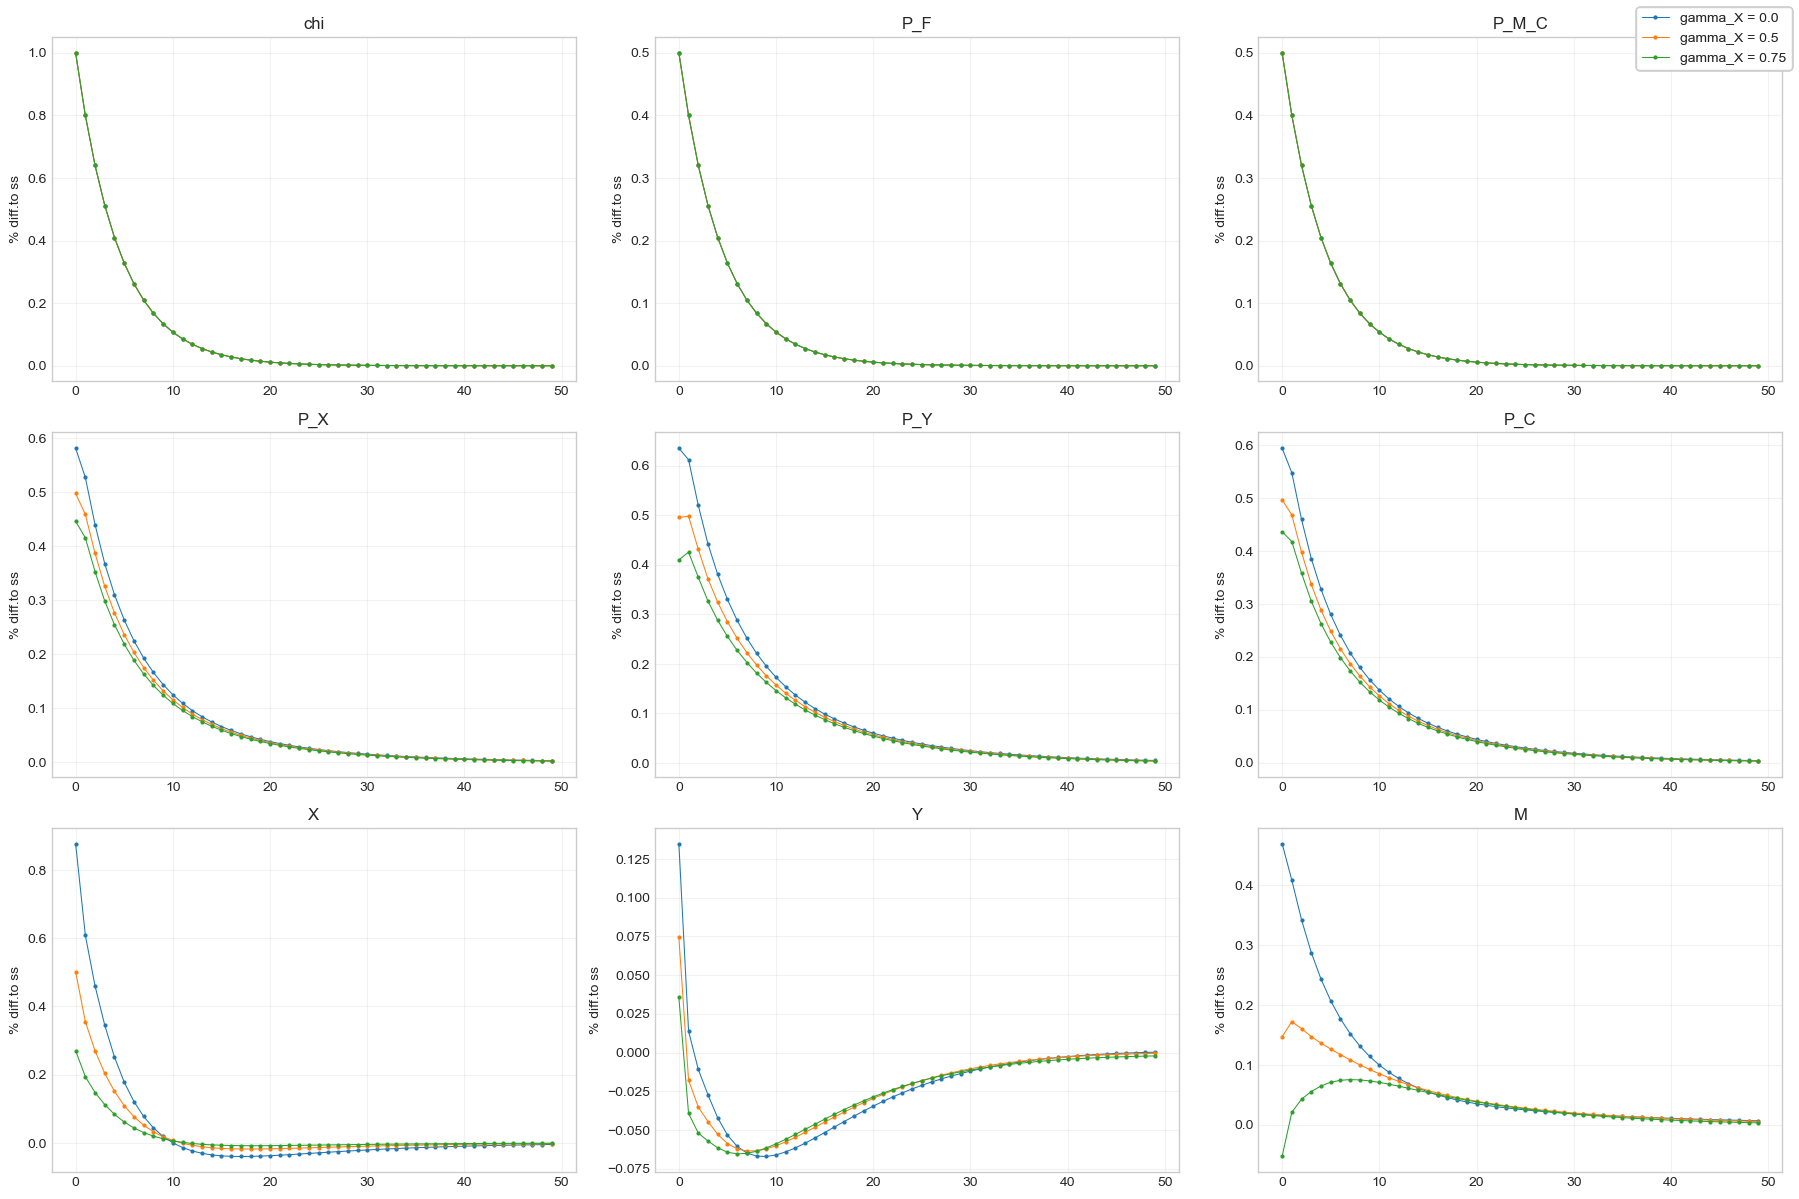

In [9]:
model.plot_IRF_models(models,parameter,varlist=['chi','P_F','P_M_C','P_X','P_Y','P_C','X','Y','M'])

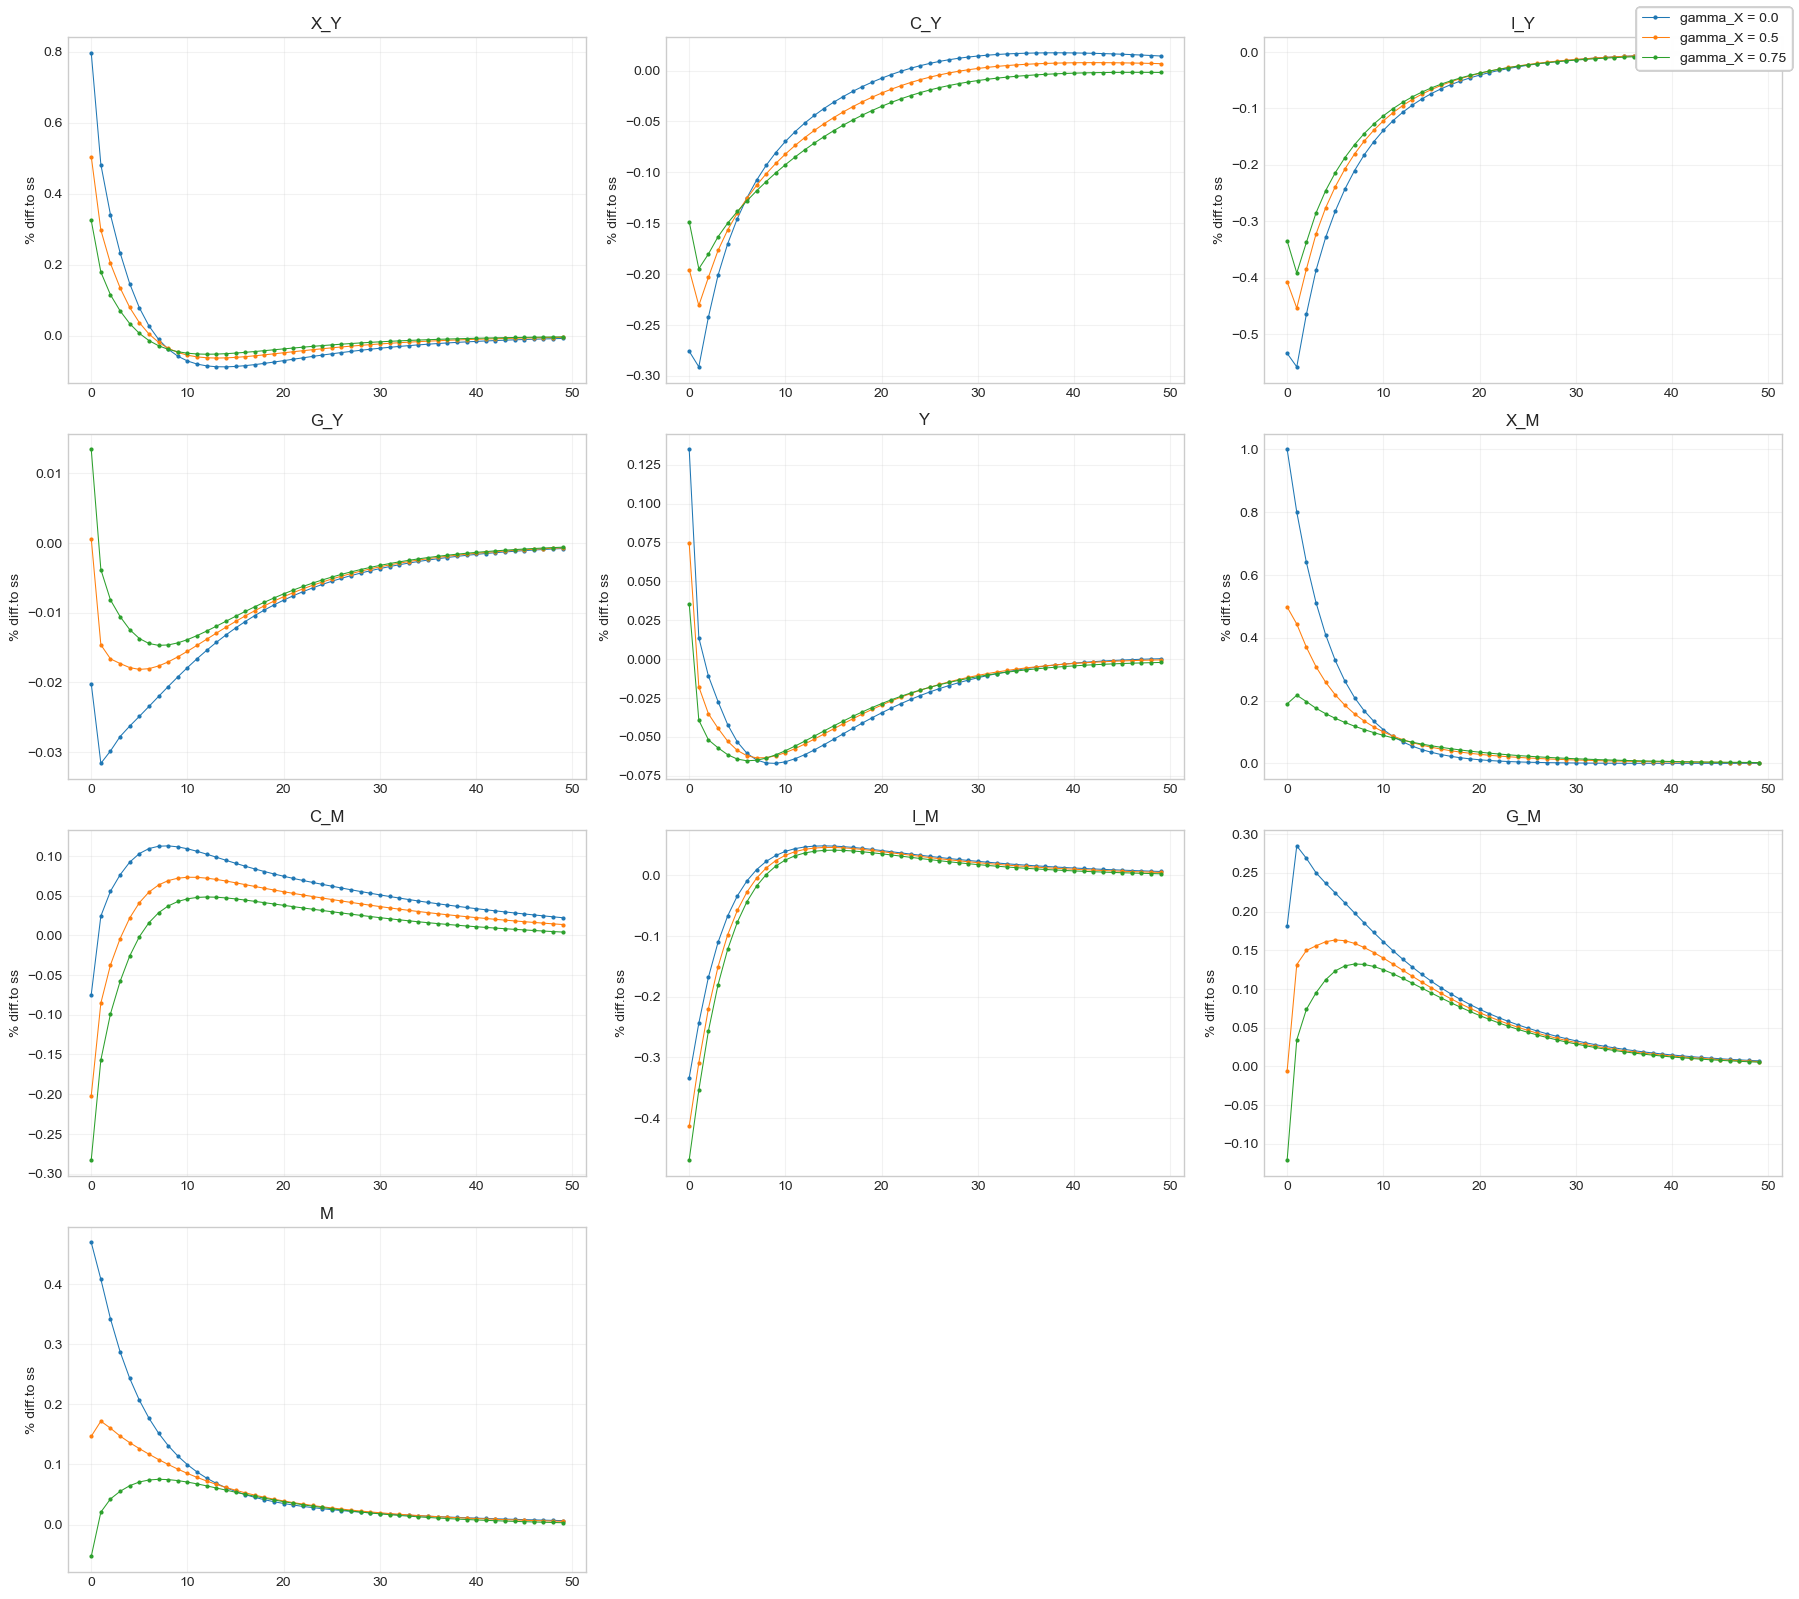

In [12]:
model.plot_IRF_models(models,parameter,varlist=['X_Y','C_Y','I_Y','G_Y','Y','X_M','C_M','I_M','G_M','M'])